In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

import statsmodels.api as sm
import seaborn as sns
from matplotlib import rcParams

# #绘图前的基本设置

# myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# # 设置matplotlib正常显示中文和负号
# # matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# # matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# matplotlib.rcParams['font.size'] = 14.0
# # matplotlib.rcParams['font.family'] = 'sans-serif'  
# plt.rcParams['font.family'] = 'Times New Roman'
# # matplotlib.rcParams['font.sans-serif'] = 'SimSun,Times New Roman' # NSimSun 新宋体字体   宋体：SimSuncss
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
# %matplotlib inline  
# #内嵌绘图，并且可以省略掉plt.show()这一步
# os.chdir('E:\\热浪\\figure')


In [2]:
myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 14.0
matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'SimSun,Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir('E:\\热浪\\figure')

In [3]:
data = pd.read_csv('E:\\热浪\\data\\WBGT\\04 每年的热浪次数和天数.csv',encoding = 'GBK')
data = pd.DataFrame(data)

# data = data['events']
data.head()


Year  Events (times)  Duration (days)  Avarage WBGTmax (℃) over threshold  \
0  1980              59              273                                0.91   
1  1981              90              523                                1.22   
2  1982              35              175                                0.74   
3  1983              61              340                                0.94   
4  1984              51              232                                0.91   

   Cumulative WBGTmax (℃) over threshold  Avarage intensity (℃)  \
0                                   7.52                   0.91   
1                                  20.80                   1.22   
2                                   9.97                   0.74   
3                                   9.51                   0.94   
4                                   8.22                   0.91   

   Cumulative  intensity (℃)  Frequency (times)  
0                       7.52                 59  
1                      20.80                 90  
2                       9.97                 35  
3                       9.51                 61  
4                       8.22                 51

In [4]:
yr_range = max(data["Year"]) - min(data["Year"]) + 1
print(yr_range)



40


In [5]:
#### Regressions, no intercept addition is needed because we're using SK LEARN HERE 

def lm_func(df, col):
    
    "simple linear model of a time series data, returns coef"
    
    # Get Data
    X_year = np.array(df["Year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Regress
    model = sm.OLS(Y_stats, X_year_2).fit() 
        
    coef = model.params[1]
#     coef = int(model.params[1])
    #coef = int(coef)
            
    # R2 and P
    r2 = model.rsquared_adj
    p = model.pvalues[0]
    
    return coef, round(r2, 2), round(p, 3)

In [6]:
coef, r2, p = lm_func(data, 'Cumulative WBGTmax (℃) over threshold')

In [7]:
print(coef, r2, p )

0.41386116322701333 0.31 0.0


In [8]:
coef, r2, p = lm_func(data, 'Avarage WBGTmax (℃) over threshold')

In [9]:
print(coef, r2, p )

0.006066604127579678 0.13 0.021


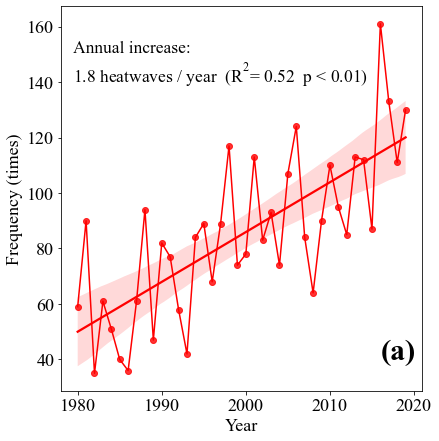

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
matplotlib.rcParams['font.size'] = 18.0
# rcParams['axes.xmargin'] = 0.01
# rcParams['axes.ymargin'] = 0.01
# plt.subplots_adjust(left=0.001, right=0.002, top=0.002, bottom=0.001,wspace=0.001)

plt.subplots_adjust(left=0.14, right=0.975, top=0.99, bottom=0.1)

plt.rcParams['font.sans-serif'] = 'Times New Roman'
g = sns.regplot(x="Year",y="Frequency (times)",data=data,color="r") #画回归图看取值范围
g = sns.lineplot(data=data, x="Year",y="Frequency (times)",color="r")
coef, r2, p = lm_func(data, 'Frequency (times)')
# text = 'Annual increase:\n'+str(round(coef, 1))+' days $yr^-1$'
text = 'Annual increase:\n'+str(round(coef, 2))+' heatwaves / year '+ ' ($\mathregular{R^2}$= '+ str(round(r2, 2))+'  p < 0.01) '


plt.text(x=1979.5,y=140 , s= text, size=17.5, color = 'black')
plt.text(x=2016,y=40 , s= "(a)", size=30, color = 'black',fontweight='bold')

plt.savefig('04 test1.jpg', dpi=300)
plt.show()

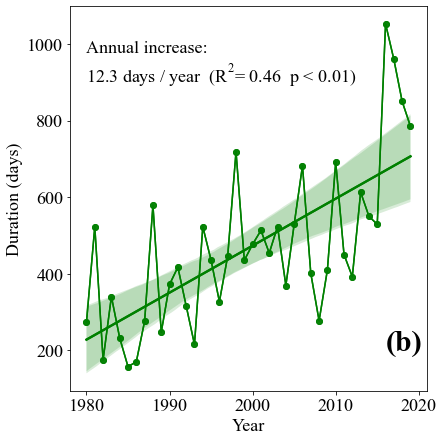

In [13]:
color = "g"
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(left=0.15, right=0.975, top=0.99, bottom=0.1)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
g = sns.regplot(x="Year",y="Duration (days)",data=data,color= color ) #画回归图看取值范围
g = sns.lineplot(data=data, x="Year",y="Duration (days)",color= color)
coef, r2, p = lm_func(data, 'Duration (days)')


text = 'Annual increase:\n'+str(round(coef, 1))+' days / year '+ ' ($\mathregular{R^2}$= '+ str(round(r2, 2))+'  p < 0.01) '

sns.regplot(x="Year",y="Duration (days)",data=data,color= color) #画回归图看取值范围
sns.lineplot(data=data, x="Year",y="Duration (days)",color=color)
plt.text(x=1980,y=900 , s= text, size=18, color = 'black')
plt.text(x=2016,y=200 , s= "(b)", size=30, color = 'black',fontweight='bold')
plt.savefig('04 test2.jpg', dpi=300)
plt.show()

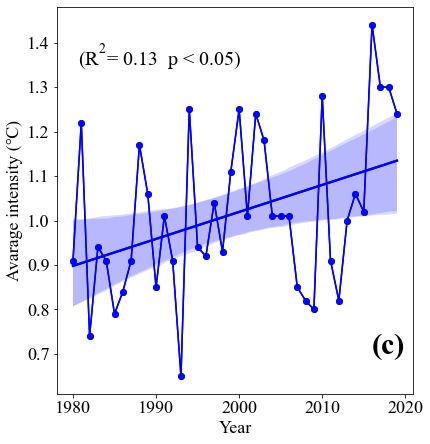

In [14]:
color = "b"
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(left=0.15, right=0.975, top=0.995, bottom=0.1)
# plt.rcParams['font.sans-serif'] = 'Times New Roman'
g = sns.regplot(x="Year",y="Avarage intensity (℃)",data=data,color= color ) #画回归图看取值范围
g = sns.lineplot(data=data, x="Year",y="Avarage intensity (℃)",color= color)
coef, r2, p = lm_func(data, 'Avarage intensity (℃)')

# text =  ' (R2='+ str(round(r2, 2))+'  p < 0.05) '
text = ' ($\mathregular{R^2}$= '+  str(round(r2, 2))+'  p < 0.05) '

sns.regplot(x="Year",y="Avarage intensity (℃)",data=data,color= color) #画回归图看取值范围
sns.lineplot(data=data, x="Year",y="Avarage intensity (℃)",color=color)
plt.text(x=1980,y=1.35 , s= text, size=20, color = 'black')
plt.text(x=2016,y=0.7 , s= "(c)", size=30, color = 'black',fontweight='bold')
# matplotlib.pyplot.text(x=0.4, y=0.4, s= text, size=12, color = 'red')
plt.savefig('04 test3.jpg', dpi=300)
plt.show()

In [63]:
import pymannkendall as mk
data_ET = data['Avarage intensity (℃)'] 

result = mk.original_test(data_ET)
trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(data_ET)
print(result)
print(trend)

Mann_Kendall_Test(trend='increasing', h=True, p=0.01715612871318095, z=2.3833445460655653, Tau=0.26282051282051283, s=205.0, var_s=7326.333333333333, slope=0.005131578947368423, intercept=0.9099342105263157)
increasing


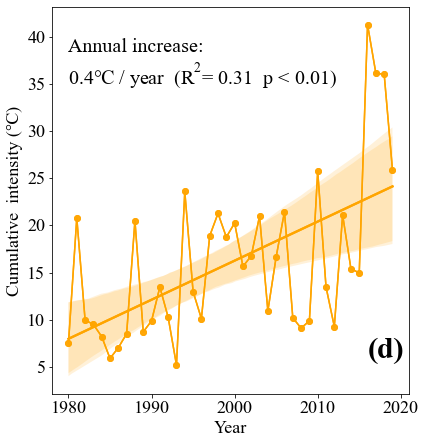

In [15]:
color = "orange"
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(left=0.15, right=0.975, top=0.995, bottom=0.1)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
g = sns.regplot(x="Year",y="Cumulative  intensity (℃)",data=data,color= color ) #画回归图看取值范围
g = sns.lineplot(data=data, x="Year",y="Cumulative  intensity (℃)",color= color)
coef, r2, p = lm_func(data, 'Cumulative  intensity (℃)')
text = 'Annual increase:\n'+str(round(coef, 1))+ '℃ / year '+ ' ($\mathregular{R^2}$= '+ str(round(r2, 2))+'  p < 0.01) '
# text =  ' (R2='+ str(round(r2, 2))+'  p < 0.05) '
# text = ' ($\mathregular{R^2}$ ='+ str(round(r2, 2))+'  p < 0.01) '

sns.regplot(x="Year",y="Cumulative  intensity (℃)",data=data,color= color) #画回归图看取值范围
sns.lineplot(data=data, x="Year",y="Cumulative  intensity (℃)",color=color)
plt.text(x=1980,y=35 , s= text, size=20, color = 'black')
plt.text(x=2016,y=6 , s= "(d)", size=30, color = 'black',fontweight='bold')
plt.savefig('04 test4.jpg', dpi=300)
plt.show()

In [37]:
data_ET = data['Cumulative  intensity (℃)'] 

result = mk.original_test(data_ET)
trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(data_ET)
print(result)
print(trend)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0004334195957205189, z=3.5188512814998734, Tau=0.38846153846153847, s=303.0, var_s=7365.666666666667, slope=0.35844470046082955, intercept=7.235328341013825)
increasing


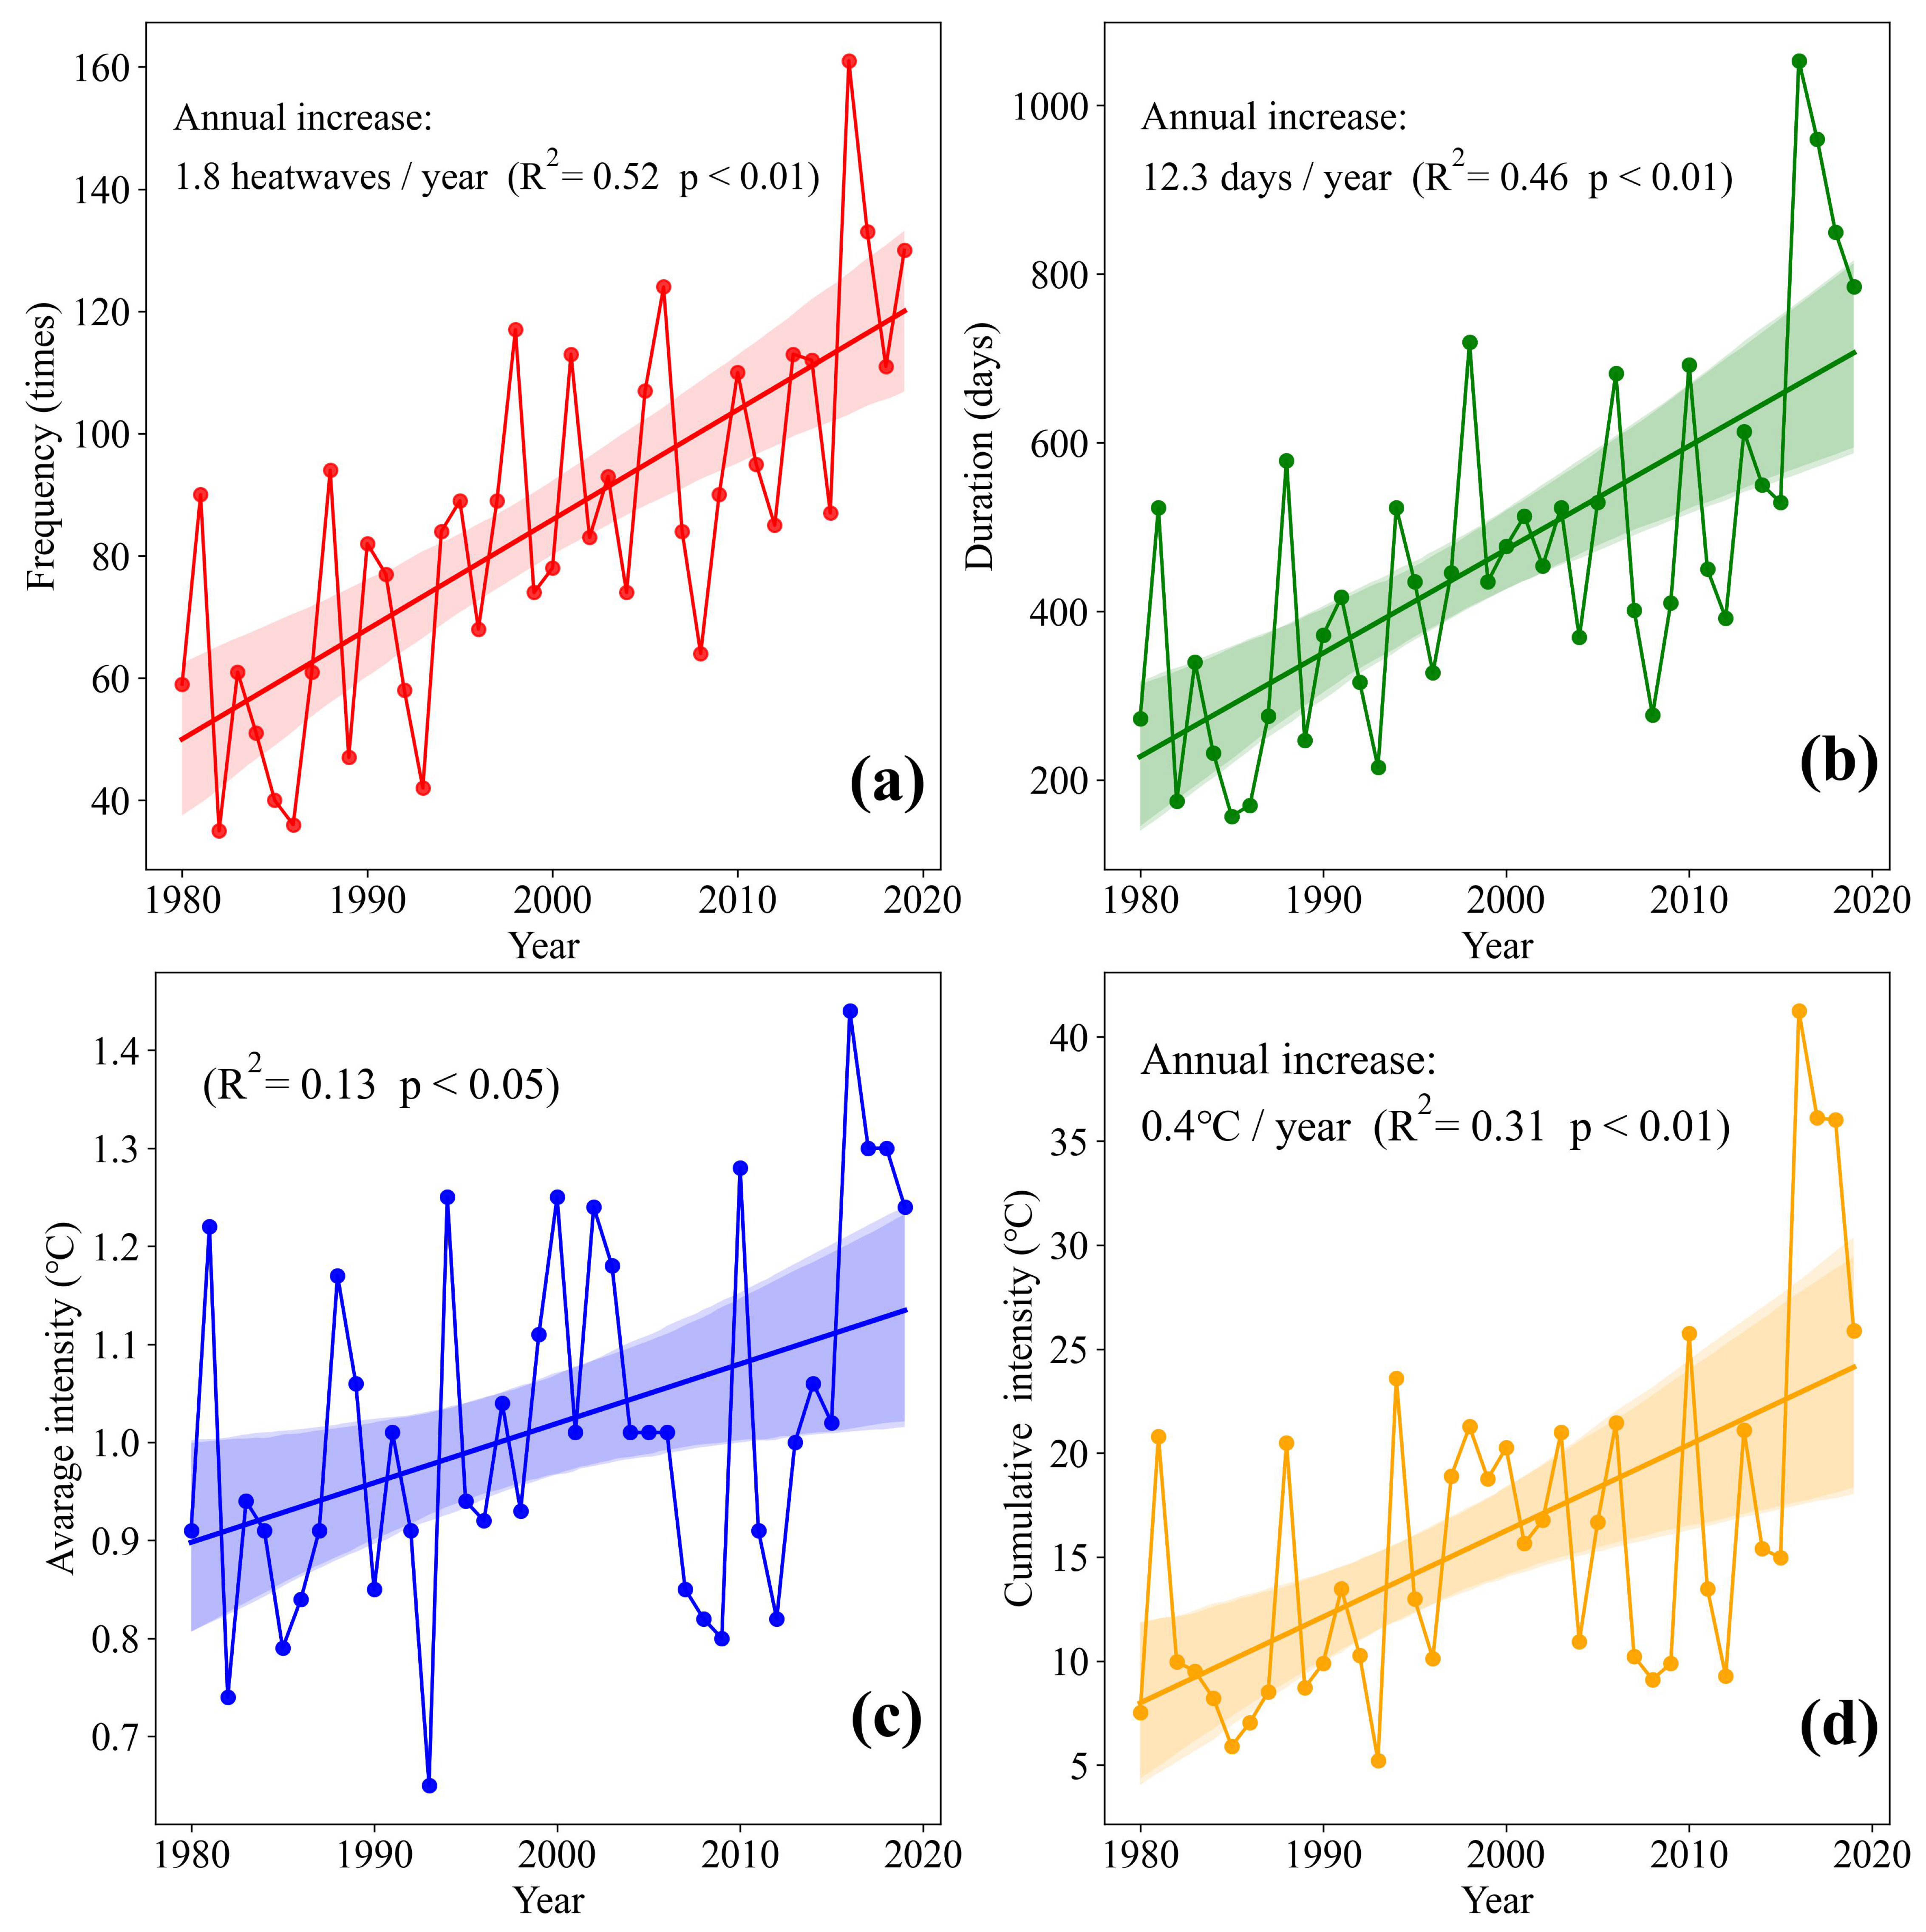

In [16]:
image1 = mpimg.imread('04 test1.jpg')
image2 = mpimg.imread('04 test2.jpg')
image3 = mpimg.imread('04 test3.jpg')
image4 = mpimg.imread('04 test4.jpg')

from PIL import Image
plt.figure(figsize=(15,15), dpi=300)
plt.figure(1)

plt.subplot(221)#22 分割成2行2列，选中第一个
plt.axis('off')
plt.imshow(image1)

plt.subplot(222)
plt.axis('off')
plt.imshow(image2)

plt.subplot(223)
plt.axis('off')
plt.imshow(image3)

plt.subplot(224)
plt.axis('off')
plt.imshow(image4)

plt.tight_layout(pad=0.1,h_pad=0.1,w_pad=0.3)
# plt.tight_layout()
plt.savefig("全国热浪变化汇总.jpg")